# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')
next(lines,None) #to skip first line 
# place your loading code here

dataset = list(lines)
for i in range(len(dataset)):
    dataset[i] = [float(x) for x in dataset[i]]
dataset = np.asarray(dataset)

Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




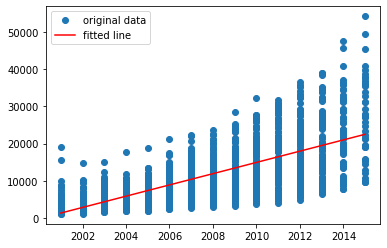

Coefficients: 
 1509.0938253352238

Intercept: 
 -3018309.4849569635


In [151]:
# linear regression with linregress (estimate price from year)

regr_year = stats.linregress(dataset[:,1],dataset[:,3])
#if skip first line
#regr = stats.linregress(dataset[1:3],dataset[1:,1])

import matplotlib.pyplot as plt
plt.plot(dataset[:,1], dataset[:,3], 'o', label = 'original data')
plt.plot(dataset[:,1], regr_year.intercept + regr_year.slope*dataset[:,1], 'r', label = 'fitted line')
plt.legend()
plt.show()

# The coefficients
print('Coefficients: \n', regr_year.slope)
# The coefficients
print('\nIntercept: \n', regr_year.intercept) 

In [36]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)

year  = dataset[:,1]
price = dataset[:,3]

# MAKE 2D ARRAY FOR BOTH Xs AND Ys      x_i -> x(i, x_i) = (n_sample, sample)
regr = linear_model.LinearRegression().fit(year[:, np.newaxis],price[:, np.newaxis])

# The coefficients
print('Coefficients: \n', regr.coef_)
# The coefficients
print('\nIntercept: \n', regr.intercept_) 

# Predict price from car from 2005, 2008 and 2013
pred_year = np.array([1995,1998,1999])
#price_pred_from_year = reg.predict(pred_year[:, np.newaxis])
price_pred_from_year = regr.predict(np.array([[2005],[2008],[2013]]))



Coefficients: 
 [[1509.09382534]]

Intercept: 
 [-3018309.48495696]


In [148]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !

#year = np.reshape(year, (len(year)))
year_2D = year.reshape((-1, 1)) 
price_2D= price.reshape((-1,1))

#A1 = np.dot( year , year_transposed )
A = np.dot(year, year)

print( np.shape(year_2D), np.shape(price))
print(A)
b = np.dot(price,year_2D)
print(b)


(1297, 1) (1297,)
5230895939.0
[3.2131102e+10]


In [149]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....


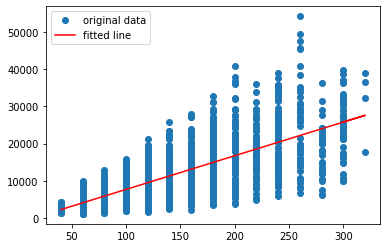

In [80]:
# linear regression with linregress (estimate price from power)

regr_pow = stats.linregress(dataset[:,2],dataset[:,3])
#if skip first line
#regr = stats.linregress(dataset[1:2],dataset[1:,3])

import matplotlib.pyplot as plt
plt.plot(dataset[:,2], dataset[:,3], 'o', label = 'original data')
plt.plot(dataset[:,2], regr_pow.intercept + regr_pow.slope*dataset[:,2], 'r', label = 'fitted line')
plt.legend()
plt.show()

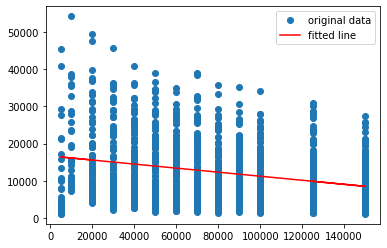

In [52]:
# linear regression with linregress (estimate price from km)

regr_km = stats.linregress(dataset[:,0],dataset[:,3])
#if skip first line
#regr = stats.linregress(dataset[1:0],dataset[1:,3])

import matplotlib.pyplot as plt
plt.plot(dataset[:,0], dataset[:,3], 'o', label = 'original data')
plt.plot(dataset[:,0], regr_km.intercept + regr_km.slope*dataset[:,0], 'r', label = 'fitted line')
plt.legend()
plt.show()

In [155]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print('Correlation coefficient price(year): ',regr_year.rvalue)
print('Correlation coefficient price(km): '  , regr_km.rvalue )
print('Correlation coefficient price(pow):'  , regr_pow.rvalue)

Correlation coefficient price(year):  0.6767043169095446
Correlation coefficient price(km):  -0.25728674299884974
Correlation coefficient price(pow): 0.7085500315263968


In [ ]:
# Optional : 2D linear regression with linear model (estimate price from year and power)

